In [1]:
import numpy as np
# import sympy as symb
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [125]:
domainlx = 152     # from -1 to 1
domainly = 32      # from -1 to 1
gridnx   = 153 # 151 grids 1-151; 0 152 index for ghost point
gridny   = 33  # 31  grids 1-31; 0 32  index for ghost point
gridt    = 5000
D        = 0.5
# r       = 0.45 # D * delta t / delta x ^2
dx      = 1.
dy      = 1.
u       = 0.4
v       = 0
dt      = 0.2
B_con      = np.zeros((gridnx,gridny,gridt))    
O_con      = np.zeros((gridnx,gridny,gridt))
# B_con = 0.
# O_con = 
kr    = 0.01
ka    = 0.02
osat  = 8. # 
O_con = osat
qb    = 70. # mg / s 
# steady state:
# delta function at 10m 15m
B_con[int(10./dx)+1,int(15./dy)+1] = qb/dx/dy

In [126]:

stept   = 1000    #

for it in range(0,stept):
    # B.C. and ghost point
    # domain x: 1-151 y:1-31 ; ghost point x: 0,152 ; y: 0,32
    # inflow
    B_con[2,:]   = -B_con[0,:]
    B_con[1,:]   = 0.
    # outflow
    B_con[152,:] = B_con[150,:]
    # soild boundary v = 0
    B_con[:,0]   = -B_con[:,2]
    B_con[:,32]  = -B_con[:,30]
    #
    for i in  range(1,gridnx-1):
        for j in range(1,gridny-1):
            # B_con[i, j]=( B_con[i+1, j]+B_con[i-1, j]+B_con[i,j+1]+B_con[i,j-1]-u*dx/2/D*(B_con[i+1,j]-B_con[i-1,j]) ) / (2 + kr*dx**2/D)
            B_con[int(10./dx)+1,int(15./dy)+1,it] = qb/dx/dy
            B_con[int(10./dx)+1,int(15./dy)+1,it+1] = qb/dx/dy
            B_con[i,j,it+1]=B_con[i,j,it] - u*dt/2/dx*(B_con[i+1,j,it]-B_con[i-1,j,it]) + \
                D/2/dx**2*dt*(B_con[i+1,j,it] + B_con[i-1,j,it] - 2*B_con[i,j,it])+ \
                D/2/dy**2*dt*(B_con[i,j+1,it] + B_con[i,j-1,it] - 2*B_con[i,j,it])+ \
                (-1)*dt*kr*B_con[i,j,it]
            

In [170]:
B_con.max()

70.0

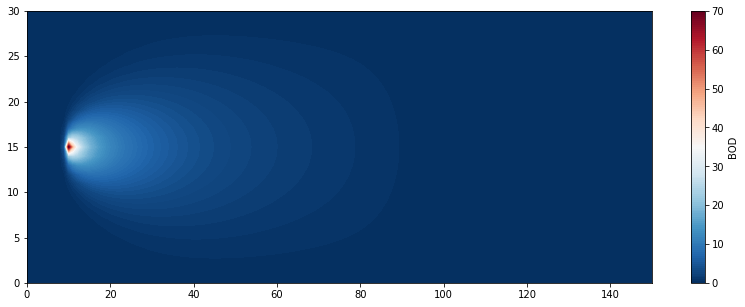

In [310]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1,figsize=(14,5))
# custom_zlim = (0, 2.0)
# plt.setp(ax, zlim=custom_zlim, ylim=custom_ylim)
norm = matplotlib.colors.Normalize(vmin=0, vmax=70.)

cnrt = ax.contourf(np.linspace(0,150,151),np.linspace(0,30,31),B_con[1:152,1:32,1000].T,levels = 150,cmap="RdBu_r", norm = norm,vmin=0,vmax=70)
# ax1 = ax[1].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,int(1./deltat)],levels = 10,cmap="RdBu_r",norm = norm,vmin=0,vmax=0.8,level=6)
# im = ax.imshow(data, cmap='bone')
# im.clim(vmin=0,vmax=70)
plt.colorbar(cnrt,ax=ax,label='BOD',ticks=np.linspace(0,100,11))
# plt.clim(0,70)
# bound = [0, 10, 20, 40 ,50 ,70]




In [255]:
O_con      = np.zeros((gridnx,gridny,5000))
O_con[:,:,:] = 8.
O_con.shape

(153, 33, 5000)

In [270]:

stept   = 1000    #

for it in range(0,stept):
    # B.C. and ghost point
    # domain x: 1-151 y:1-31 ; ghost point x: 0,152 ; y: 0,32
    # inflow
    O_con[0,:]   = 2*osat-O_con[2,:]
    O_con[1,:]   = osat
    # outflow
    O_con[152,:] = O_con[150,:]
    # soild boundary v = 0
    O_con[:,0]   = -O_con[:,2]
    O_con[:,32]  = -O_con[:,30]
    #
    for i in  range(1,gridnx-1):
        for j in range(1,gridny-1):
            # B_con[i, j]=( B_con[i+1, j]+B_con[i-1, j]+B_con[i,j+1]+B_con[i,j-1]-u*dx/2/D*(B_con[i+1,j]-B_con[i-1,j]) ) / (2 + kr*dx**2/D)
            # B_con[int(10./dx)+1,int(15./dy)+1,it] = qb/dx/dy
            # B_con[int(10./dx)+1,int(15./dy)+1,it+1] = qb/dx/dy
            O_con[i,j,it+1]=O_con[i,j,it] - u*dt/2/dx*(O_con[i+1,j,it]-O_con[i-1,j,it]) + \
                D/2/dx**2*dt*(O_con[i+1,j,it] + O_con[i-1,j,it] - 2*O_con[i,j,it])+ \
                D/2/dy**2*dt*(O_con[i,j+1,it] + O_con[i,j-1,it] - 2*O_con[i,j,it])+ \
                dt*ka*(osat - O_con[i,j,it]) - dt*kr*B_con[i,j,it]

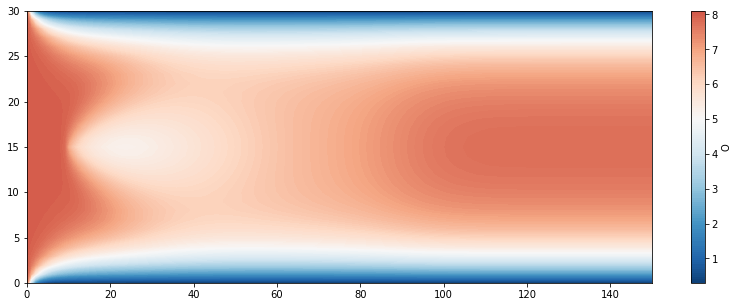

In [323]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1,figsize=(14,5))
# custom_zlim = (0, 2.0)
# plt.setp(ax, zlim=custom_zlim, ylim=custom_ylim)
norm = matplotlib.colors.Normalize(vmin=0, vmax=8.)

cnrt = ax.contourf(np.linspace(0,150,151),np.linspace(0,30,31),O_con[1:152,1:32,1000].T,levels = 150,cmap="RdBu_r", norm = norm,vmin=0,vmax=10)
# ax1 = ax[1].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,int(1./deltat)],levels = 10,cmap="RdBu_r",norm = norm,vmin=0,vmax=0.8,level=6)
# im = ax.imshow(data, cmap='bone')
# im.clim(vmin=0,vmax=70)
plt.colorbar(cnrt,ax=ax,label='O',ticks=np.linspace(0,10,11))
# plt.clim(0,70)
# bound = [0, 10, 20, 40 ,50 ,70]


Text(0.5, 0, 'grid distance (m)')

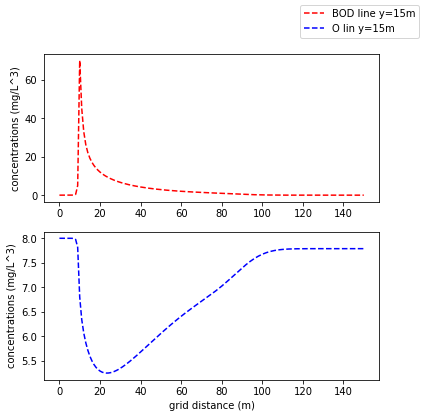

In [355]:
import matplotlib.ticker as tck

fig,ax = plt.subplots(2,figsize=(6,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax0=ax[0].plot(np.linspace(0,150,151), B_con[1:152,16,1000].T,'--r', label='BOD line y=15m')
ax1=ax[1].plot(np.linspace(0,150,151), O_con[1:152,16,1000].T,'--b', label='O lin y=15m')
# ax.plot(xx**2, yy_f2**2,'-xg', label='fourth-order')
# ax.plot(xx**2, xx**2,'--xb', label='correct')
# ax.set_xscale("log", basex=10)
# ax.set_yscale("log", basey=10)
fig.legend(loc='upper right')
# ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
# ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

# ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
# ax.yaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax[0].set_ylabel('concentrations (mg/L^3)')
ax[1].set_ylabel('concentrations (mg/L^3)')
# ax[0].set_xlabel('grid distance (m)')
ax[1].set_xlabel('grid distance (m)')
#     ax[nn].legend(')
# plt.savefig("./p1t1-1")